## import dataset

In [1]:
#Importing modules
import pandas as pd
 
# Read data into df
df = pd.read_csv(r"C:\Users\Venkat Dyagala\Desktop\TBA_Class\TBA\IMDB Dataset.csv")
# Print head
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## plotting priority

<AxesSubplot:xlabel='sentiment'>

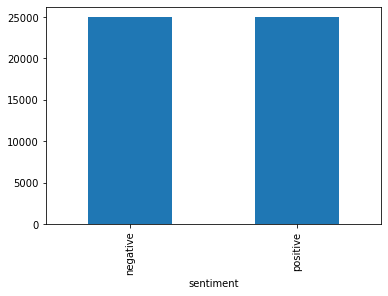

In [2]:
df['sentiment'].value_counts().sort_index().plot(kind='bar')

## Removing odd words

In [3]:
import html
import re
def clean(text):
    # convert html escapes like & to characters.
    text = html.unescape(text) 
    # tags like 
    text = re.sub(r'<[^<>]*>', ' ', text)
    # markdown URLs like [Some text](https://....)
    text = re.sub(r'\[([^\[\]]*)\]\([^\(\)]*\)', r'\1', text)
    # text or code in brackets like [0]
    text = re.sub(r'\[[^\[\]]*\]', ' ', text)
    # standalone sequences of specials, matches  but not #cool
    text = re.sub(r'(?:^|\s)[<>{}\[\]+|\\:-]{1,}(?:\s|$)', ' ', text)
    # standalone sequences of hyphens like --- or ==
    text = re.sub(r'(?:^|\s)[\-=\+]{2,}(?:\s|$)', ' ', text)
    # sequences of white spaces
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

In [4]:
df.columns

Index(['review', 'sentiment'], dtype='object')

## Data cleaning

In [5]:
df = df.dropna()
df['review'] = df['review'].apply(clean)
df = df[df['review'].str.len() > 50]
df.sample(2)

,review,sentiment
15257,Why oh why don't blockbuster movies simply sti...,negative
22524,I was very surprised with this film. I was tou...,positive


## Splitting the Data

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df['review'],
                                                    df['sentiment'],
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=df['sentiment'])

print('Size of Training Data ', X_train.shape[0])
print('Size of Test Data ', X_test.shape[0])

Size of Training Data  39997
Size of Test Data  10000


## Converting X_trains into the numbers

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
tfidf = TfidfVectorizer(min_df = 10, ngram_range=(1,2), stop_words="english")
X_train_tf = tfidf.fit_transform(X_train)
X_test_tf = tfidf.transform(X_test)

## Initializing model

In [8]:
from sklearn.svm import LinearSVC

model1 = LinearSVC(random_state=0, tol=1e-5)
model1.fit(X_train_tf, Y_train)

LinearSVC(random_state=0, tol=1e-05)

## Getting accuracy value

In [9]:
from sklearn.metrics import accuracy_score

Y_pred = model1.predict(X_test_tf)
print ('Accuracy Score - ', accuracy_score(Y_test, Y_pred))

Accuracy Score -  0.9061


## Running dummy classifier

In [10]:
from sklearn.dummy import DummyClassifier
clf = DummyClassifier(strategy='most_frequent', random_state=42)
clf.fit(X_train, Y_train)
Y_pred_baseline = clf.predict(X_test)
print ('Accuracy Score - ', accuracy_score(Y_test, Y_pred_baseline))

Accuracy Score -  0.5


## Confusing matrix

In [11]:
from sklearn.metrics import confusion_matrix
Y_pred = model1.predict(X_test_tf)
confusion_matrix(Y_test, Y_pred)

array([[4483,  517],
       [ 422, 4578]], dtype=int64)

## Plotting confusing matrix

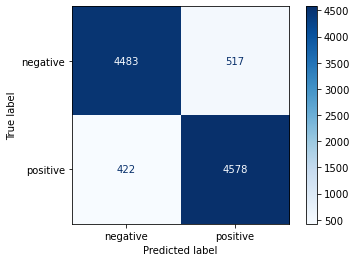

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay as CMD
import matplotlib.pyplot as plt

cm = confusion_matrix(Y_test, Y_pred)
disp = CMD(confusion_matrix=cm, display_labels=model1.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

## Classification report

In [13]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

    negative       0.91      0.90      0.91      5000
    positive       0.90      0.92      0.91      5000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



## Down sampling

In [14]:
# Filter bug reports with priority P3 and sample 4000 rows from it
df_sampleP3 = df[df['sentiment'] == 1].sample(n=0, random_state=123)

# Create a separate dataframe containing all other bug reports
df_sampleRest = df[df['sentiment'] != 1]

# Concatenate the two dataframes to create the new balanced bug reports dataset
df_balanced = pd.concat([df_sampleRest, df_sampleP3])

# Check the status of the class imbalance
df_balanced['sentiment'].value_counts()

sentiment
positive    25000
negative    24997
Name: count, dtype: int64

## Repeating everything

In [17]:
# Loading the balanced dataframe

df = df_balanced[['review', 'sentiment']]
df = df.dropna()

# Step 1 - Data Preparation

df['review'] = df['review'].apply(clean)

# Step 2 - Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(df['review'],
                                                    df['sentiment'],
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=df['sentiment'])
print('Size of Training Data ', X_train.shape[0])
print('Size of Test Data ', X_test.shape[0])

# Step 3 - Training the Machine Learning model

tfidf = TfidfVectorizer(min_df=10, ngram_range=(1, 2), stop_words="english")
X_train_tf = tfidf.fit_transform(X_train)

model1 = LinearSVC(random_state=0, tol=1e-5)
model1.fit(X_train_tf, Y_train)

# Step 4 - Model Evaluation

X_test_tf = tfidf.transform(X_test)
Y_pred = model1.predict(X_test_tf)
print('Accuracy Score - ', accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

Size of Training Data  39997
Size of Test Data  10000
Accuracy Score -  0.9061
              precision    recall  f1-score   support

    negative       0.91      0.90      0.91      5000
    positive       0.90      0.92      0.91      5000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



## Finding best with gridsearchCV

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
# Flag that determines the choice of SVC (True) and LinearSVC (False)
runSVC = True
# Loading the dataframe
df = pd.read_csv(r"C:\Users\Venkat Dyagala\Desktop\TBA_Class\TBA\IMDB Dataset.csv")
df = df.dropna()
# Step 1 - Data Preparation
df['review'] = df['review'].apply(clean)
df = df[df['review'].str.len() > 50]
if (runSVC):
    # Sample the data when running SVC to ensure reasonable run-times
    df = df.groupby('sentiment', as_index=False).apply(pd.DataFrame.sample,
                                                       random_state=42,
                                                       frac=.2)
# Step 2 - Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(df['review'],
                                                    df['sentiment'],
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=df['sentiment'])
print('Size of Training Data ', X_train.shape[0])
print('Size of Test Data ', X_test.shape[0])
# Step 3 - Training the Machine Learning model
tfidf = TfidfVectorizer(stop_words="english")
if (runSVC):
    model = SVC(random_state=42, probability=True)
    grid_param = [{
        'tfidf__min_df': [5, 10],
        'tfidf__ngram_range': [(1, 3), (1, 6)],
        'model__C': [1, 100],
        'model__kernel': ['linear']
    }]
else:
    model = LinearSVC(random_state=42, tol=1e-5)
    grid_param = {
        'tfidf__min_df': [5, 10],
        'tfidf__ngram_range': [(1, 3), (1, 6)],
        'model__C': [1, 100],
        'model__loss': ['hinge']
    }
training_pipeline = Pipeline(
    steps=[('tfidf', TfidfVectorizer(stop_words="english")), ('model', model)])
gridSearchProcessor = GridSearchCV(estimator=training_pipeline,
                                   param_grid=grid_param,
                                   cv=5)
gridSearchProcessor.fit(X_train, Y_train)
best_params = gridSearchProcessor.best_params_
print("Best alpha parameter identified by grid search ", best_params)

best_result = gridSearchProcessor.best_score_
print("Best result identified by grid search ", best_result)

best_model = gridSearchProcessor.best_estimator_

# Step 4 - Model Evaluation

Y_pred = best_model.predict(X_test)
print('Accuracy Score - ', accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

Size of Training Data  7999
Size of Test Data  2000
